In [7]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [8]:
fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.random.randn(fs)

In [9]:
# Apply Discrete Wavelet Transform using 'db4' wavelet
coeffs = pywt.wavedec(signal, 'db4', level=5)

# Apply Inverse Discrete Wavelet Transform using 'db4' wavelet
reconstructed_signal = pywt.waverec(coeffs, 'db4')

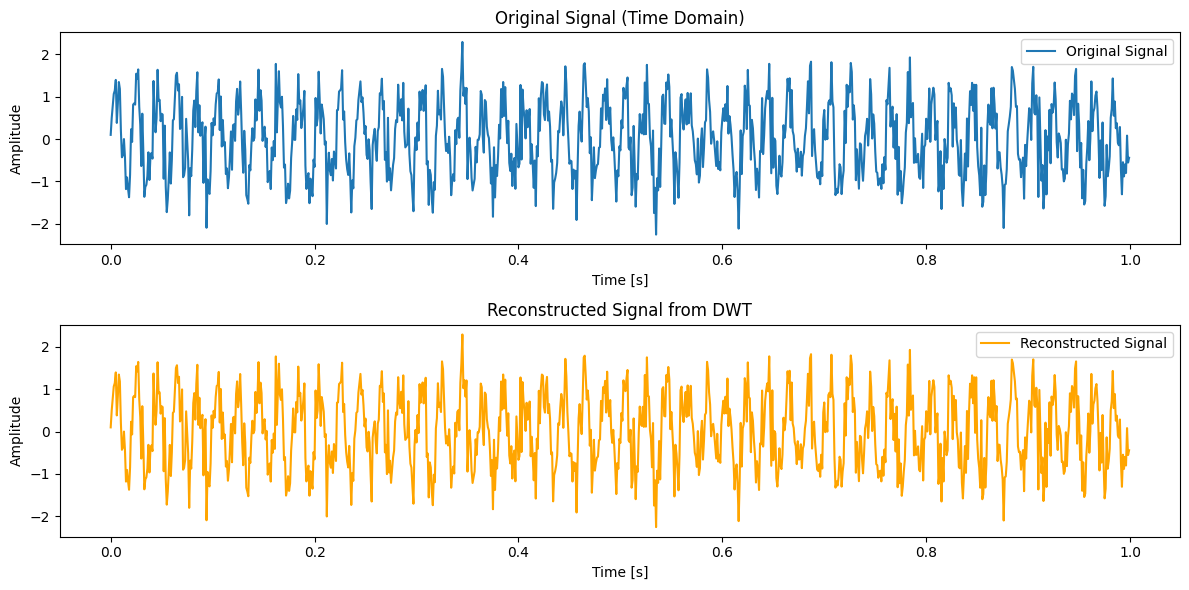

In [10]:
# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.title('Original Signal (Time Domain)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t[:len(reconstructed_signal)], reconstructed_signal, label='Reconstructed Signal', color='orange')
plt.title('Reconstructed Signal from DWT')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

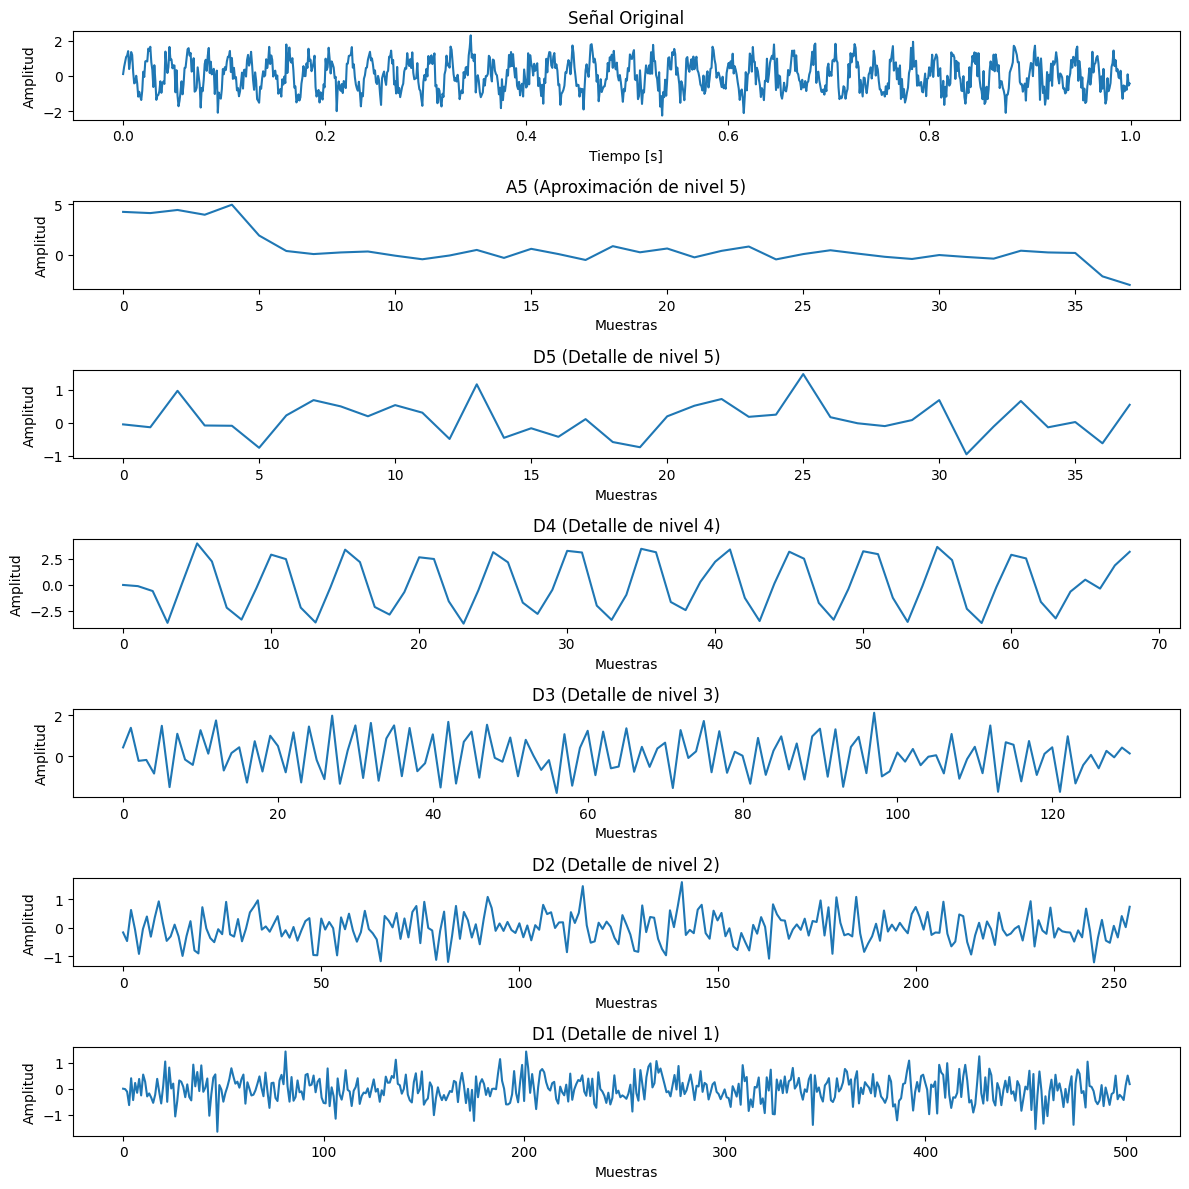

In [11]:
# Graficar los niveles de descomposición
fig, axes = plt.subplots(len(coeffs) + 1, 1, figsize=(12, 12))

# Graficar la señal original
axes[0].plot(t, signal)
axes[0].set_title('Señal Original')
axes[0].set_xlabel('Tiempo [s]')
axes[0].set_ylabel('Amplitud')

# Graficar cada nivel de descomposición (Aproximaciones y Detalles)
for i, coef in enumerate(coeffs):
    if i == 0:
        title = 'A5 (Aproximación de nivel 5)'
    else:
        title = f'D{6 - i} (Detalle de nivel {6 - i})'
    axes[i + 1].plot(coef)
    axes[i + 1].set_title(title)
    axes[i + 1].set_xlabel('Muestras')
    axes[i + 1].set_ylabel('Amplitud')

plt.tight_layout()
plt.show()